# NetworkX exercise 

In [2]:
%matplotlib inline
import networkx as nx
import vis_bel
import os
import pickle
import imp
import numpy as np
import itertools as itt

In [3]:
base = os.environ['BUG_FREE_EUREKA_BASE']
path_networkx_AD_pickled =os.path.join(base,'data','exercise05','networkx.graph.AD.pickled')

## Loading Alzheimer's disease network into networkX graph with pickle

In [4]:
graph_AD = pickle.load(open(path_networkx_AD_pickled,'rb'))

Here some words about [pickle](https://docs.python.org/3/library/pickle.html)

In [5]:
type(graph_AD)

networkx.classes.multidigraph.MultiDiGraph

### Explore

In [6]:
len(graph_AD),len(graph_AD.nodes()), graph_AD.number_of_nodes()  # number of nodes

(11927, 11927, 11927)

In [7]:
graph_AD.number_of_edges() # number of nodes

59408

In [8]:
graph_AD[1] # node 1 connections with edge information

{2: {0: {'Subgraph': ('Non-amyloidogenic pathway', 'Gamma secretase pathway'),
   'citation': ('Other', 'Connectors', '123'),
   'evidence': 'The statements inside this citation is included to connect two entity types or triples, which will exist as islands/subnetworks in the big model.',
   'object_activity': 'act',
   'rel': 'decreases'},
  1: {'DiseaseState': ('Mild AD',),
   'FDASTATUS': ('Phase 3',),
   'Subgraph': ('Notch pathway', 'Gamma secretase pathway'),
   'citation': ('PubMed', 'Curr Med Chem. 2011;18(35):5430-47', '22087836'),
   'evidence': 'gamma-Secretase inhibitor believed to be associated with the inhibition of the cleavage of Notch, a transmembrane receptor involved in regulating cell-fate decisions.',
   'object_activity': 'pep',
   'rel': 'decreases'}},
 1828: {0: {'DiseaseState': ('Mild AD',),
   'FDASTATUS': ('Phase 3',),
   'Subgraph': ('Notch pathway', 'Gamma secretase pathway'),
   'citation': ('PubMed', 'Curr Med Chem. 2011;18(35):5430-47', '22087836'),
   '

In [9]:
graph_AD[1].keys() # nodes ids connected to node 1 

dict_keys([2, 1828])

In [10]:
graph_AD[1][2].keys()

dict_keys([0, 1])

In [11]:
graph_AD[1][2][0].get('rel')

'decreases'

In [12]:
graph_AD.nodes()[:2] # all nodes

[1, 2]

In [13]:
graph_AD.nodes(data=True)[:2]

[(1,
  {'BEL': 'a(CHEBI:"gamma-secretase inhibitor")',
   'function': 'a',
   'namespace': 'CHEBI',
   'value': 'gamma-secretase inhibitor'}),
 (2,
  {'BEL': 'complex(SCOMP:"gamma Secretase Complex")',
   'function': 'complex',
   'namespace': 'SCOMP',
   'value': '"gamma Secretase Complex"'})]

In [14]:
graph_AD.edges()[:2]

[(1, 2), (1, 2)]

In [15]:
graph_AD.edges(data=True,keys=True)[:2]

[(1,
  2,
  0,
  {'Subgraph': ('Non-amyloidogenic pathway', 'Gamma secretase pathway'),
   'citation': ('Other', 'Connectors', '123'),
   'evidence': 'The statements inside this citation is included to connect two entity types or triples, which will exist as islands/subnetworks in the big model.',
   'object_activity': 'act',
   'rel': 'decreases'}),
 (1,
  2,
  1,
  {'DiseaseState': ('Mild AD',),
   'FDASTATUS': ('Phase 3',),
   'Subgraph': ('Notch pathway', 'Gamma secretase pathway'),
   'citation': ('PubMed', 'Curr Med Chem. 2011;18(35):5430-47', '22087836'),
   'evidence': 'gamma-Secretase inhibitor believed to be associated with the inhibition of the cleavage of Notch, a transmembrane receptor involved in regulating cell-fate decisions.',
   'object_activity': 'pep',
   'rel': 'decreases'})]

In [16]:
#nodes = np.random.choice(graph,size=100,replace=False)


In [17]:
nodes = set(itt.chain.from_iterable((formN,toN) for formN,toN  in graph_AD.edges()[:100]))

In [18]:
graph_100 = graph_AD.subgraph(nodes)

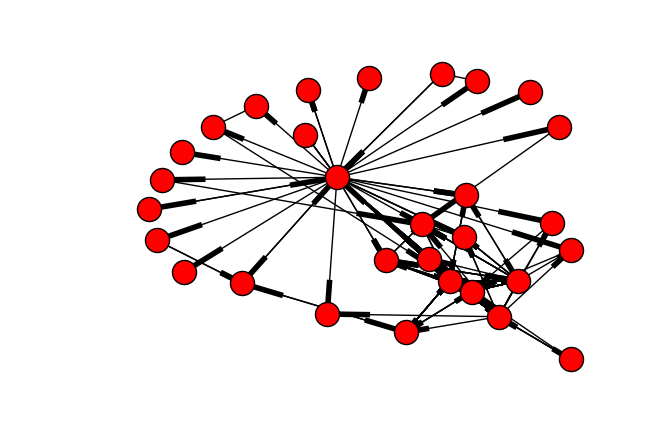

In [19]:
nx.draw(graph_100)

In [20]:
imp.reload(vis_bel)
vis_bel.draw(graph_100)


In [21]:
for edge in graph_100.edges_iter(data=True,keys=True):
    print(edge)
    break

(1, 2, 0, {'citation': ('Other', 'Connectors', '123'), 'object_activity': 'act', 'rel': 'decreases', 'Subgraph': ('Non-amyloidogenic pathway', 'Gamma secretase pathway'), 'evidence': 'The statements inside this citation is included to connect two entity types or triples, which will exist as islands/subnetworks in the big model.'})


## Tasks

0. Find the node with the highest degree in graph_100
0. get all distinct attribute keys in nodes and edges for graph_100
0. Write a function which allows you to search all edges in the graph_100 with any key (or key/value). Allow value to be optional
0. Find shortest paths between all nodes link to the edges found in the previsious task and create a new graph, display it 

**hint** : Write a function which allows you to search all edges in the graph_100 with any key (or key/value). Allow value to be optional

In [23]:
#Task 1 - Find the node with the highest degree in graph_100

highest_degree=graph_100.degree()
max(highest_degree, key=highest_degree.get)


{1: 3, 2: 46, 3: 208, 4: 20, 5: 46, 6: 252, 263: 3, 266: 15, 12: 3, 291: 1, 1537: 2, 279: 6, 292: 1, 155: 15, 92: 7, 731: 4, 289: 2, 290: 1, 611: 4, 2212: 2, 293: 1, 294: 2, 7: 105, 942: 2, 1217: 4, 1534: 3, 1828: 2, 2936: 9, 2937: 17, 11457: 2}


6

In [61]:
#Task 2 - get all distinct attribute keys in nodes and edges for graph_100

node_keys=set()
for node in graph_100.nodes_iter(data=True):
    for key_list in node[1].keys():
        
        node_keys.add(key_list)
print(node_keys)


edges_keys=set()
for edge in graph_100.edges_iter(data=True,keys=True):
    for key_list in edge[3].keys():
        edges_keys.add(key_list)
print(edges_keys)
    

{'function', 'value', 'namespace', 'list', 'BEL', 'valid_NSV'}
{'object_translocation_from_value', 'UserdefinedCellLine', 'subject_translocation_to_namespace', 'FluidAndSecretion', 'Species', 'MeSHDisease', 'NervousSystem', 'Encode_Feature_Types', 'Tissue', 'DigestiveSystem', 'subject_translocation_from_value', 'subject_translocation_to_value', 'UserdefinedGender', 'Developmental_Phase__of_patient', 'rel', 'subject_activity', 'Duration_of_Chemical_Exposure', 'evidence', 'Subgraph', 'CellStructure', 'object_translocation_to_value', 'object_activity', 'Cell', 'DiseaseState', 'FDASTATUS', 'UserdefinedSpecies', 'CellLine', 'object_translocation', 'subject_translocation_from_namespace', 'citation', 'object_translocation_to_namespace', 'subject_translocation', 'CardiovascularSystem', 'object_translocation_from_namespace'}


In [27]:
# Task 3 - 

def find_edge_by_attrib_key_value(graph,attribKey,attribValue=None):
    edge_list = []
    if attribValue is None:
        for item in graph_100.edges(data=True):
                if attribKey in item[2]:
                    edge_list.append(item)
    else:            
        for item in graph_100.edges(data=True):
            if attribKey in item[2]:
                if attribValue in item[2][attribKey]:
                    edge_list.append(item)                    
    return edge_list if edge_list else False


#find_edge_by_attrib_key_value(graph_100, 'MeSHDisease', 'Alzheimer Disease')
find_edge_by_attrib_key_value(graph_100,'Subgraph','Gamma secretase pathway')

[(1,
  2,
  {'Subgraph': ('Non-amyloidogenic pathway', 'Gamma secretase pathway'),
   'citation': ('Other', 'Connectors', '123'),
   'evidence': 'The statements inside this citation is included to connect two entity types or triples, which will exist as islands/subnetworks in the big model.',
   'object_activity': 'act',
   'rel': 'decreases'}),
 (1,
  2,
  {'DiseaseState': ('Mild AD',),
   'FDASTATUS': ('Phase 3',),
   'Subgraph': ('Notch pathway', 'Gamma secretase pathway'),
   'citation': ('PubMed', 'Curr Med Chem. 2011;18(35):5430-47', '22087836'),
   'evidence': 'gamma-Secretase inhibitor believed to be associated with the inhibition of the cleavage of Notch, a transmembrane receptor involved in regulating cell-fate decisions.',
   'object_activity': 'pep',
   'rel': 'decreases'}),
 (1,
  1828,
  {'DiseaseState': ('Mild AD',),
   'FDASTATUS': ('Phase 3',),
   'Subgraph': ('Notch pathway', 'Gamma secretase pathway'),
   'citation': ('PubMed', 'Curr Med Chem. 2011;18(35):5430-47', '

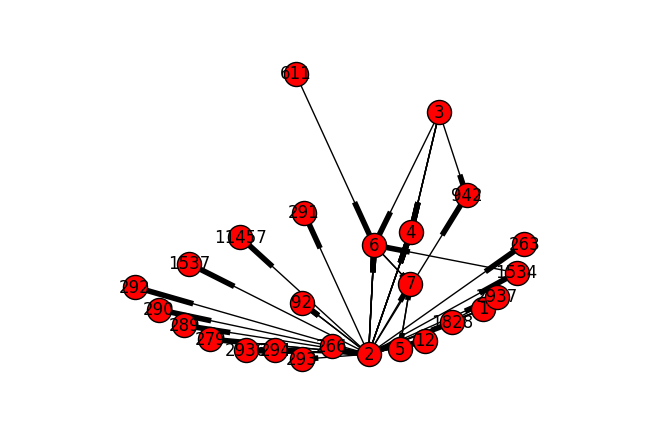

In [30]:
#Task 4 - Shortest path for the subgraph obtained above :

#build a subgraph :
lst_edges_Gamma_Pathway = find_edge_by_attrib_key_value(graph_100,'Subgraph','Gamma secretase pathway')
Gamma_Pathway_subgraph = nx.MultiDiGraph()
Gamma_Pathway_subgraph.add_edges_from(lst_edges_Gamma_Pathway)

#Draw the subgraph
nx.draw(Gamma_Pathway_subgraph,with_labels=True)



In [31]:

#Find shortest path - when no source and target node is specified, 
#shortest path is found considering each node as a source and the rest as target
nx.shortest_path(Gamma_Pathway_subgraph)

{1: {1: [1],
  2: [1, 2],
  4: [1, 2, 4],
  5: [1, 2, 7, 5],
  6: [1, 2, 6],
  7: [1, 2, 7],
  12: [1, 2, 12],
  92: [1, 2, 92],
  263: [1, 2, 263],
  266: [1, 2, 266],
  279: [1, 2, 279],
  289: [1, 2, 289],
  290: [1, 2, 290],
  291: [1, 2, 291],
  292: [1, 2, 292],
  293: [1, 2, 293],
  294: [1, 2, 294],
  942: [1, 2, 942],
  1534: [1, 2, 1534],
  1537: [1, 2, 1537],
  1828: [1, 1828],
  2936: [1, 2, 2936],
  2937: [1, 2, 2937],
  11457: [1, 2, 11457]},
 2: {2: [2],
  4: [2, 4],
  5: [2, 7, 5],
  6: [2, 6],
  7: [2, 7],
  12: [2, 12],
  92: [2, 92],
  263: [2, 263],
  266: [2, 266],
  279: [2, 279],
  289: [2, 289],
  290: [2, 290],
  291: [2, 291],
  292: [2, 292],
  293: [2, 293],
  294: [2, 294],
  942: [2, 942],
  1534: [2, 1534],
  1537: [2, 1537],
  1828: [2, 1828],
  2936: [2, 2936],
  2937: [2, 2937],
  11457: [2, 11457]},
 3: {3: [3],
  4: [3, 4],
  5: [3, 6, 7, 5],
  6: [3, 6],
  7: [3, 6, 7],
  942: [3, 942],
  2937: [3, 6, 7, 5, 2937]},
 4: {4: [4]},
 5: {5: [5], 7: [5, 